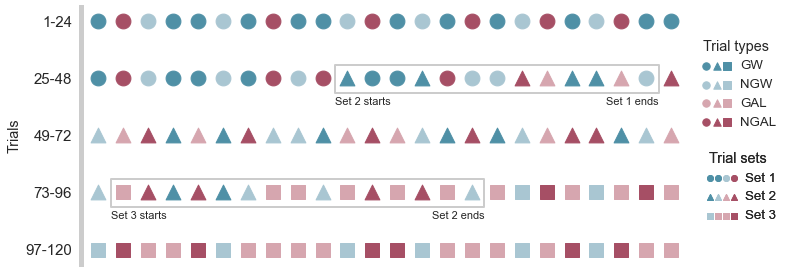

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import dirname
from pandas import read_csv
from itertools import product
from matplotlib.legend_handler import HandlerTuple
sns.set_theme(style='white', context='notebook', font_scale=1.2)
ROOT_DIR = dirname(dirname(dirname(os.path.realpath('__file__'))))
np.random.seed(47404)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define plot parameters.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Define aesthetics.
order = ['gw', 'ngw', 'gal', 'ngal']
palette = sns.diverging_palette(220, 20, n=4).as_hex()
palette = ['#4f90a6', '#a9c6d2', '#d6a6af', '#a64f65']
markers = ['o','^','s']

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Initialize canvas.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Initialize canvas.
fig, ax = plt.subplots(1, 1, figsize=(10,4))

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Load and prepare data.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Load sample data.
data = read_csv(os.path.join(ROOT_DIR, 'study02', 'data', 's1', 'pgng.csv')).head(120)

## Restrict to columns of interest.
data = data[['trial','robot','stimulus']]

## Format data.
data['x'] = (data.trial - 1) % 24
data['y'] = (data.trial - 1) // 24
data['third'] = (data.stimulus // 4).astype(int)

## Reorder stimuli IDs. 
replace = {'gw': 0, 'ngw': 1, 'gal': 2, 'ngal': 3}
f = lambda x: ''.join(['%0.0f' %x.robot, '%0.0f' %x.stimulus])
data['stimulus'] = np.unique(data.replace(replace).apply(f, 1), return_inverse=True)[-1]

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Panel A: Task schematic.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## First loop.
p1 = []
for color, marker in product(palette, markers):
    p = ax.scatter(-99, -99, s=220, color=color, marker=marker)
    p1.append(p)

## Second loop.
p2 = []
for i in np.unique(data.stimulus):
    
    ## Extract current stimulus.
    df = data.query(f'stimulus == {i}')
    
    ## Define aesthetics.
    color = palette[order.index(df.robot.values[0])]
    marker = markers[df.third.values[0]]
    
    ## Plot trials.
    p = ax.scatter(df.x, df.y, s=220, color=color, marker=marker)
    p2.append(p)
            
## Adjust x-axis.
ax.set(xlim=(-0.7,24), xticks=[], xlabel='')

## Adjust y-axis.
ax.set(ylim=(-0.25,4.25), yticks=np.arange(5), ylabel='Trials')
ax.set_yticklabels(['1-24','25-48','49-72','73-96','97-120'], ha='right', fontsize=15)
ax.tick_params(axis='y', which='major', pad=3)
ax.invert_yaxis()

## Define legend (trial types).
l1 = ax.legend(
    handles = [
        tuple(p1[i] for i in np.unique(data.query('robot == "gw"').stimulus)), 
        tuple(p1[i] for i in np.unique(data.query('robot == "ngw"').stimulus)), 
        tuple(p1[i] for i in np.unique(data.query('robot == "gal"').stimulus)), 
        tuple(p1[i] for i in np.unique(data.query('robot == "ngal"').stimulus))], 
    labels = ['GW','NGW','GAL','NGAL'], 
    loc = 7,
    frameon = False,
    handler_map = {tuple: HandlerTuple(ndivide=None)},
    bbox_to_anchor=(1.15,0.7), 
    markerscale=0.5,
    title='Trial types'
)

## Define legend (trial sets).
l2 = ax.legend(
    handles = [
        tuple(p2[i] for i in np.unique(data.query('third == 0').stimulus)),
        tuple(p2[i] for i in np.unique(data.query('third == 1').stimulus)),
        tuple(p2[i] for i in np.unique(data.query('third == 2').stimulus))],
    labels = ['Set 1','Set 2','Set 3'], 
    loc = 7,
    frameon = False,
    handler_map = {tuple: HandlerTuple(ndivide=None)},
    bbox_to_anchor=(1.15,0.3), 
    markerscale=0.4,
    title = 'Trial sets',
    prop = {'weight': 'normal'}
)

## Adjust legends.
l1._legend_box.align = "left"
l2._legend_box.align = "left"

## Add legends.
ax.add_artist(l1)
ax.add_artist(l2)

## Add annotations.
ax.annotate('Set 2 starts', xy=(0, 0), xycoords='data', 
            xytext=(9.5, 1.5), textcoords='data', ha='left', va='bottom', fontsize=11)
ax.annotate('Set 1 ends', xy=(0, 0), xycoords='data', 
            xytext=(22.5, 1.5), textcoords='data', ha='right', va='bottom', fontsize=11)

ax.annotate('Set 3 starts', xy=(0, 0), xycoords='data', 
            xytext=(0.5, 3.5), textcoords='data', ha='left', va='bottom', fontsize=11)
ax.annotate('Set 2 ends', xy=(0, 0), xycoords='data', 
            xytext=(15.5, 3.5), textcoords='data', ha='right', va='bottom', fontsize=11)

## Adjust spines.
sns.despine(left=False, right=True, top=True, bottom=True, ax=ax)
ax.spines['left'].set_linewidth(5); ax.spines['left'].set_color('0.8')

ax.fill_between([9.5, 22.5], 1.25, 0.77, color='none', edgecolor='0.8', capstyle='round', lw=2, zorder=-1)
ax.fill_between([0.5, 15.5], 3.25, 2.77, color='none', edgecolor='0.8', lw=2, zorder=-1)

plt.tight_layout()

## version 2

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import dirname
from pandas import read_csv
sns.set_theme(style='white', context='notebook', font_scale=1.2)
ROOT_DIR = dirname(dirname(dirname(os.path.realpath('__file__'))))

Text(0.5, 1.0, 'One block of the Infinite Robots task')

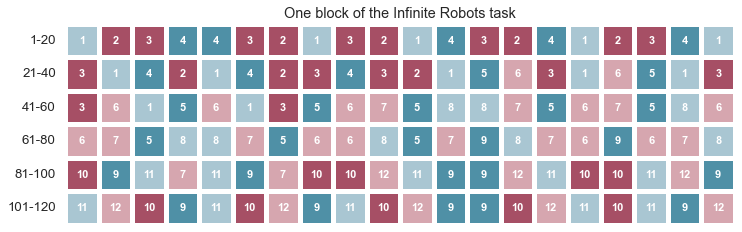

In [4]:

## Define aesthetics.
order = ['GW', 'NGW', 'GAL', 'NGAL']
palette = sns.diverging_palette(220, 20, n=4).as_hex()
palette = ['#4f90a6', '#a9c6d2', '#d6a6af', '#a64f65']
yticklabels=['1-20','21-40','41-60','61-80','81-100','101-120']

## Load data.
data = read_csv('../support/example23.csv')

arr = data.robot.replace({'GW': 1, 'NGW': 2, 'GAL': 3, 'NGAL': 4}).values.reshape(6,20)
order = data.stimulus.values.reshape(6,20)
ix = np.array(np.meshgrid(np.arange(20), np.arange(6))).reshape(2,-1).T

fig, ax = plt.subplots(1, 1, figsize=(12,6))
sns.heatmap(arr, cmap=palette, square=True, lw=5, linecolor='w', cbar=False,
            xticklabels=[], yticklabels=yticklabels)

for i, j in ix:
    ax.annotate(order[j,i], (0,0), (i+0.5,j+0.5), ha='center', va='center',
                color='w', fontsize=11, fontweight='bold')

ax.set_title('One block of the Infinite Robots task')

## Version 3

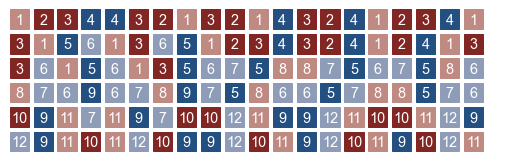

In [74]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import dirname
from pandas import read_csv
from matplotlib.patches import Rectangle
sns.set_theme(style='white', context='notebook', font_scale=1.2)
ROOT_DIR = dirname(dirname(dirname(os.path.realpath('__file__'))))

## Load data.
data = read_csv('../support/example23.csv')

## Define trial types.
types = data.robot.replace({'GW': 0, 'GAL': 1, 'NGW': 2, 'NGAL': 3}).values.reshape(6,20)
types[1::2,:] = types[1::2,::-1]

## Define stimuli.
stimuli = data.stimulus.values.reshape(6,20)
stimuli[1::2,:] = stimuli[1::2,::-1]

## Define positions.
pos = np.array(np.meshgrid(np.arange(stimuli.shape[0]), np.arange(stimuli.shape[1]))).reshape(2,-1).T

## Initialize canvas.
fig, ax = plt.subplots(1, 1, figsize=(9,2.7))

## Define styling.
palette = ['#234f81', '#8e9cb8', '#bf8a82', '#812623']
width = 0.8

## Iteratively plot.
for y, x in pos:
    ax.add_patch(Rectangle((x-width/2, y-width/2), width, width, color=palette[types[y,x]]))
    ax.text(x, y + 5e-2, stimuli[y,x], ha='center', va='center', color='w')
    

    
ax.set(xlim=(-0.5,20.5), xticks=[], ylim=(-0.5,5.5), yticks=[])
ax.invert_yaxis()

sns.despine(ax=ax, left=True, right=True, top=True, bottom=True)